# Importing Module

In [1]:
import torch
from torch import nn
from torch import optim
from torch.nn import functional as F
from torch.utils.data import DataLoader

from torchvision import datasets
from torchvision import transforms

import os
import numpy as np
from matplotlib import pyplot as plt

# Loading Data

In [2]:
def find_data_dir():
    data_path = 'data'
    while os.path.exists(data_path) != True:
        data_path = '../' + data_path
        
    return data_path

In [3]:
# MNIST dataset
mnist_train = datasets.MNIST(root=find_data_dir(),
                          train=True,
                          transform=transforms.ToTensor(),
                          download=True)
print("Downloading Train Data Done ! ")

mnist_test = datasets.MNIST(root=find_data_dir(),
                         train=False,
                         transform=transforms.ToTensor(),
                         download=True)
print("Downloading Test Data Done ! ")

# Defining Model

In [4]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# our model
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.linear = nn.Linear(784,10)

    def forward(self, X):
        X = self.linear(X)
        return X

model = Model().to(device)

criterion  = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Training Phase

In [6]:
batch_size = 100

data_iter = DataLoader(mnist_train, batch_size=100, shuffle=True, num_workers=1)

for epoch in range(10):
    
    avg_loss = 0
    total_batch = len(mnist_train)//batch_size
    
    for i, (batch_img, batch_lab) in enumerate(data_iter):
        
        X = batch_img.view(-1, 28*28).to(device)
        Y = batch_lab.to(device)
        
        y_pred = model.forward(X)
        
        loss = criterion(y_pred, Y)
        # Zero gradients, perform a backward pass, and update the weights.

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        avg_loss += loss
        if (i+1)%100 == 0 :
            print("Epoch : ", epoch+1, "Iteration : ", i+1, " Loss : ", avg_loss.data.cpu().numpy()/(i+1))
    print("Epoch : ", epoch+1, " Loss : ", avg_loss.data.cpu().numpy()/(i+1))
print("Training Done !")

Epoch :  1 Iteration :  100  Loss :  1.89637451171875
Epoch :  1 Iteration :  200  Loss :  1.6269911193847657
Epoch :  1 Iteration :  300  Loss :  1.4459269205729166
Epoch :  1 Iteration :  400  Loss :  1.3205406188964843
Epoch :  1 Iteration :  500  Loss :  1.2250523681640626
Epoch :  1 Iteration :  600  Loss :  1.1498117065429687
Epoch :  1  Loss :  1.1498117065429687
Epoch :  2 Iteration :  100  Loss :  0.7193431854248047
Epoch :  2 Iteration :  200  Loss :  0.6976775360107422
Epoch :  2 Iteration :  300  Loss :  0.6800103759765626
Epoch :  2 Iteration :  400  Loss :  0.6665071105957031
Epoch :  2 Iteration :  500  Loss :  0.6536328735351562
Epoch :  2 Iteration :  600  Loss :  0.6438287862141927
Epoch :  2  Loss :  0.6438287862141927
Epoch :  3 Iteration :  100  Loss :  0.5686284255981445
Epoch :  3 Iteration :  200  Loss :  0.5605281448364258
Epoch :  3 Iteration :  300  Loss :  0.552113037109375
Epoch :  3 Iteration :  400  Loss :  0.5467464828491211
Epoch :  3 Iteration :  500  

# Evaluation

In [7]:
test_img = mnist_test.test_data.view(-1, 28*28).type(torch.FloatTensor)
test_lab = mnist_test.test_labels
outputs = model.forward(test_img)
pred_val, pred_idx = torch.max(outputs.data, 1)
correct = (pred_idx == test_lab).sum()
print('Accuracy : ', correct.data.numpy()/len(test_img)*100)

Accuracy :  90.01


# Testing

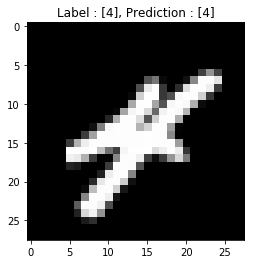

In [9]:
r = np.random.randint(0, len(mnist_test)-1)
X_single_data = mnist_test.test_data[r:r + 1].view(-1,28*28).to(device, dtype = torch.float)
Y_single_data = mnist_test.test_labels[r:r + 1].to(device, dtype = torch.long)

single_prediction = model(X_single_data)
plt.imshow(X_single_data.data.view(28,28).cpu().numpy(), cmap='gray')
plt.title("Label : {}, Prediction : {}".format(Y_single_data.data.cpu().view(1).numpy(), torch.max(single_prediction.data, 1)[1].cpu().numpy()))
plt.show()